In [1]:
%matplotlib inline

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.linalg import sqrtm

import h5py

sys.path.insert(0, os.path.abspath("../"))
from optbnn.bnn.likelihoods import LikCE
from optbnn.bnn.nets.mlp import MLP
from optbnn.bnn.priors import OptimGaussianPrior
from optbnn.sgmcmc_bayes_net.pref_net import PrefNet
from optbnn.utils import util

In [3]:
def plot_samples(
    X,
    samples,
    var=None,
    color="xkcd:bluish",
    smooth_q=False,
    ax=None,
):
    if ax is None:
        ax = plt.gca()
    if samples.ndim > 2:
        samples = samples.squeeze()
    # n_keep = int(samples.shape[1] / 10) if n_keep is None else n_keep
    # keep_idx = np.random.permutation(samples.shape[1])[:n_keep]
    mu = samples.mean(1)
    if var is None:
        q = 97.5  ## corresponds to 2 stdevs in Gaussian
        # q = 99.99  ## corresponds to 3 std
        Q = np.percentile(samples, [100 - q, q], axis=1)
        ub, lb = Q[1, :], Q[0, :]
        # ub, lb = mu + 2 * samples.std(1), mu - 2 * samples.std(1)
        if smooth_q:
            lb = moving_average(lb)
            ub = moving_average(ub)
    else:
        ub = mu + 3 * np.sqrt(var)
        lb = mu - 3 * np.sqrt(var)
    ####
    ax.fill_between(X.flatten(), ub, lb, color=color, alpha=0.25, lw=0)
    # ax.plot(X, samples[:, keep_idx], color=color, alpha=0.8)
    # ax.plot(X, mu, color=color, label=label)

In [4]:
t0012_prior_path = "./../exp/reward_learning/bb_tuning_star/br-02336596"
t0012_ckpt_path = os.path.join(t0012_prior_path, "ckpts", "it-{}.ckpt".format(300))
t0012_saved_dir = os.path.join(
    "./../exp/reward_learning/bb_optim/br-bb_t0012-b8ced45f", "sampling_optim"
)

t0025_prior_path = "./../exp/reward_learning/bb_tuning_star/br-02336596"
t0025_ckpt_path = os.path.join(t0025_prior_path, "ckpts", "it-{}.ckpt".format(300))
t0025_saved_dir = os.path.join(
    "./../exp/reward_learning/bb_optim/br-bb_t0025-08f67aeb", "sampling_optim"
)

t0048_prior_path = "./../exp/reward_learning/bb_tuning_star/br-02336596"
t0048_ckpt_path = os.path.join(t0048_prior_path, "ckpts", "it-{}.ckpt".format(300))
t0048_saved_dir = os.path.join(
    "./../exp/reward_learning/bb_optim/br-bb_t0048-34ceb1ef", "sampling_optim"
)

t0072_prior_path = "./../exp/reward_learning/bb_tuning_star/br-02336596"
t0072_ckpt_path = os.path.join(t0072_prior_path, "ckpts", "it-{}.ckpt".format(300))
t0072_saved_dir = os.path.join(
    "./../exp/reward_learning/bb_optim/br-bb_t0072-1caecd6c", "sampling_optim"
)

In [5]:
util.set_seed(13138787)
# t0012_X_train, t0012_y_train = util.load_pref_data("./../data/bb/t0012_pref.hdf5", 1.0)

# t0025_X_train, t0025_y_train = util.load_pref_data("./../data/bb/t0025_pref.hdf5", 1.0)

# t0048_X_train, t0048_y_train = util.load_pref_data("./../data/bb/t0048_pref.hdf5", 1.0)

# t0072_X_train, t0072_y_train = util.load_pref_data("./../data/bb/t0072_pref.hdf5", 1.0)

In [6]:
width = 128
depth = 3
transfer_fn = "relu"
t0012_prior = OptimGaussianPrior(t0012_ckpt_path)
t0012_net = MLP(28, 1, [width] * depth, transfer_fn)
t0012_likelihood = LikCE()
t0012_bayes_net = PrefNet(
    t0012_net, t0012_likelihood, t0012_prior, t0012_saved_dir, n_gpu=0
)
t0012_bayes_net.sampled_weights = t0012_bayes_net._load_sampled_weights(
    "./../exp/reward_learning/bb_optim/br-bb_t0012-b8ced45f/sampling_optim/sampled_weights/sampled_weights_0000007"
)
# t0012_bayes_net.find_map(t0012_X_train, t0012_y_train)
t0012_bayes_net.load_map(
    "./../exp/reward_learning/bb_optim/br-bb_t0012-b8ced45f/sampling_optim/sampled_weights/map_estimate"
)

t0025_prior = OptimGaussianPrior(t0025_ckpt_path)
t0025_net = MLP(28, 1, [width] * depth, transfer_fn)
t0025_likelihood = LikCE()
t0025_bayes_net = PrefNet(
    t0025_net, t0025_likelihood, t0025_prior, t0025_saved_dir, n_gpu=0
)
t0025_bayes_net.sampled_weights = t0025_bayes_net._load_sampled_weights(
    "./../exp/reward_learning/bb_optim/br-bb_t0025-08f67aeb/sampling_optim/sampled_weights/sampled_weights_0000007"
)
# t0025_bayes_net.find_map(t0025_X_train, t0025_y_train)
# t0025_bayes_net.save_map()
t0025_bayes_net.load_map(
    "./../exp/reward_learning/bb_optim/br-bb_t0025-08f67aeb/sampling_optim/sampled_weights/map_estimate"
)

t0048_prior = OptimGaussianPrior(t0048_ckpt_path)
t0048_net = MLP(28, 1, [width] * depth, transfer_fn)
t0048_likelihood = LikCE()
t0048_bayes_net = PrefNet(
    t0048_net, t0048_likelihood, t0048_prior, t0048_saved_dir, n_gpu=0
)
t0048_bayes_net.sampled_weights = t0048_bayes_net._load_sampled_weights(
    "./../exp/reward_learning/bb_optim/br-bb_t0048-34ceb1ef/sampling_optim/sampled_weights/sampled_weights_0000007"
)
# t0048_bayes_net.find_map(t0048_X_train, t0048_y_train)
t0048_bayes_net.load_map(
    "./../exp/reward_learning/bb_optim/br-bb_t0048-34ceb1ef/sampling_optim/sampled_weights/map_estimate"
)

t0072_prior = OptimGaussianPrior(t0072_ckpt_path)
t0072_net = MLP(28, 1, [width] * depth, transfer_fn)
t0072_likelihood = LikCE()
t0072_bayes_net = PrefNet(
    t0072_net, t0072_likelihood, t0072_prior, t0072_saved_dir, n_gpu=0
)
t0072_bayes_net.sampled_weights = t0072_bayes_net._load_sampled_weights(
    "./../exp/reward_learning/bb_optim/br-bb_t0072-1caecd6c/sampling_optim/sampled_weights/sampled_weights_0000007"
)
# t0072_bayes_net.find_map(t0072_X_train, t0072_y_train)
t0072_bayes_net.load_map(
    "./../exp/reward_learning/bb_optim/br-bb_t0072-1caecd6c/sampling_optim/sampled_weights/map_estimate"
)

with h5py.File("./../data/bb/state_data_1/t0029.hdf5") as f:
    am = f["attn_mask"][1]
    sts = f["states"][1][: int(am.sum()), ...]
    acts = f["actions"][1][: int(am.sum()), ...]


_, _, t0012_pred_map, t0012_preds = t0012_bayes_net.predict(
    np.concatenate([sts, acts], axis=-1), True, True
)
t0012_preds = t0012_preds.squeeze().T
t0012_pred_map = t0012_pred_map.squeeze()

_, _, t0025_pred_map, t0025_preds = t0025_bayes_net.predict(
    np.concatenate([sts, acts], axis=-1), True, True
)
t0025_preds = t0025_preds.squeeze().T
t0025_pred_map = t0025_pred_map.squeeze()

_, _, t0048_pred_map, t0048_preds = t0048_bayes_net.predict(
    np.concatenate([sts, acts], axis=-1), True, True
)
t0048_preds = t0048_preds.squeeze().T
t0048_pred_map = t0048_pred_map.squeeze()

_, _, t0072_pred_map, t0072_preds = t0072_bayes_net.predict(
    np.concatenate([sts, acts], axis=-1), True, True
)
t0072_preds = t0072_preds.squeeze().T
t0072_pred_map = t0072_pred_map.squeeze()

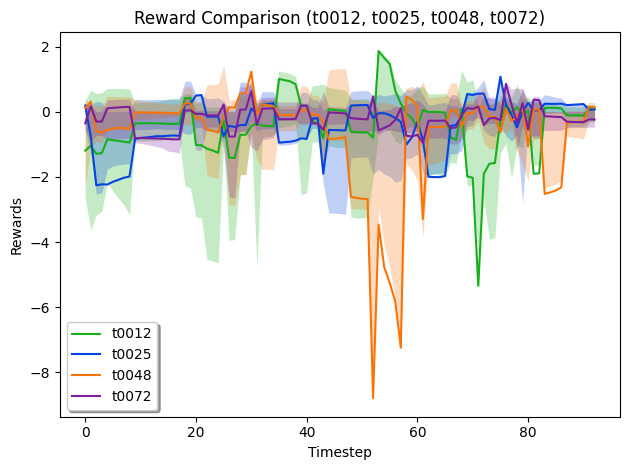

In [7]:
fig, ax = plt.subplots()
ts = np.arange(am.sum())
plot_samples(
    ts,
    t0012_preds,
    ax=ax,
    color="xkcd:green",
)
ax.plot(ts, t0012_pred_map, color="xkcd:green", label="t0012")

plot_samples(
    ts,
    t0025_preds,
    ax=ax,
    color="xkcd:blue",
)
ax.plot(ts, t0025_pred_map, color="xkcd:blue", label="t0025")

plot_samples(
    ts,
    t0048_preds,
    ax=ax,
    color="xkcd:orange",
)
ax.plot(ts, t0048_pred_map, color="xkcd:orange", label="t0048")

plot_samples(
    ts,
    t0072_preds,
    ax=ax,
    color="xkcd:purple",
)
ax.plot(ts, t0072_pred_map, color="xkcd:purple", label="t0072")

ax.set_ylabel("Rewards")
ax.set_xlabel("Timestep")
ax.set_title("Reward Comparison (t0012, t0025, t0048, t0072)")
ax.legend(loc="best", shadow=True, fancybox=True)
plt.tight_layout()
plt.show()

In [8]:
# with h5py.File("./../data/bb/state_data_1/t0029.hdf5") as f:
#     rng = np.random.default_rng(4)
#     n_samps = 1000
#     discount = 0.99
#     p_ids = ["t0012", "t0048", "t0072"]
#     dist = np.zeros((3, 3))
#     pear_dist = np.zeros((3, 3))
#     epic = np.zeros((3, 3))
#     w2 = np.zeros((3, 3))
#     total = 0.0
#     for ob in range(f["states"].shape[0]):
#         am = f["attn_mask"][ob]
#         if am.sum() > 2:
#             total += 1.0
#             sts = f["states"][ob][: int(am.sum()), ...]
#             acts = f["actions"][ob][: int(am.sum()), ...]

#             t0012_pred_mean, _, t0012_preds = t0012_bayes_net.predict(
#                 np.concatenate([sts, acts], axis=-1), True
#             )
#             t0012_preds = t0012_preds.squeeze().T
#             t0012_pred_mean = t0012_pred_mean.squeeze()[:-1]

#             t0048_pred_mean, _, t0048_preds = t0048_bayes_net.predict(
#                 np.concatenate([sts, acts], axis=-1), True
#             )
#             t0048_preds = t0048_preds.squeeze().T
#             t0048_pred_mean = t0048_pred_mean.squeeze()[:-1]

#             t0072_pred_mean, _, t0072_preds = t0072_bayes_net.predict(
#                 np.concatenate([sts, acts], axis=-1), True
#             )
#             t0072_preds = t0072_preds.squeeze().T
#             t0072_pred_mean = t0072_pred_mean.squeeze()[:-1]

#             t0012_cov = np.cov(t0012_preds[:-1, ...])
#             t0048_cov = np.cov(t0048_preds[:-1, ...])
#             t0072_cov = np.cov(t0072_preds[:-1, ...])

#             speeds = rng.uniform(0.0, 0.44, n_samps)
#             angles = rng.uniform(-180.0, 180.0, n_samps)
#             sample_acts = np.stack([speeds, angles]).T

#             t0012_r_mean = np.zeros(sts.shape[0])
#             t0048_r_mean = np.zeros(sts.shape[0])
#             t0072_r_mean = np.zeros(sts.shape[0])
#             for i in range(sts.shape[0]):
#                 sts_samps = np.repeat(
#                     sts[i, :].reshape(-1, sts.shape[1]), n_samps, axis=0
#                 )
#                 t0012_pred_mean_samps, _ = t0012_bayes_net.predict(
#                     np.concatenate([sts_samps, sample_acts], axis=-1),
#                 )
#                 t0048_pred_mean_samps, _ = t0048_bayes_net.predict(
#                     np.concatenate([sts_samps, sample_acts], axis=-1),
#                 )
#                 t0072_pred_mean_samps, _ = t0072_bayes_net.predict(
#                     np.concatenate([sts_samps, sample_acts], axis=-1),
#                 )
#                 t0012_r_mean[i] = t0012_pred_mean_samps.mean()
#                 t0048_r_mean[i] = t0048_pred_mean_samps.mean()
#                 t0072_r_mean[i] = t0072_pred_mean_samps.mean()

#             t0012_c_rewards = np.zeros(sts.shape[0] - 1)
#             t0048_c_rewards = np.zeros(sts.shape[0] - 1)
#             t0072_c_rewards = np.zeros(sts.shape[0] - 1)
#             for i in range(sts.shape[0] - 1):
#                 t0012_c_rewards[i] = (
#                     t0012_pred_mean[i]
#                     + discount * t0012_r_mean[i + 1]
#                     - t0012_r_mean[i]
#                 )
#                 t0048_c_rewards[i] = (
#                     t0048_pred_mean[i]
#                     + discount * t0048_r_mean[i + 1]
#                     - t0048_r_mean[i]
#                 )
#                 t0072_c_rewards[i] = (
#                     t0072_pred_mean[i]
#                     + discount * t0072_r_mean[i + 1]
#                     - t0072_r_mean[i]
#                 )

#             for i, part_a in enumerate(
#                 [t0012_pred_mean, t0048_pred_mean, t0072_pred_mean]
#             ):
#                 for j, part_b in enumerate(
#                     [t0012_pred_mean, t0048_pred_mean, t0072_pred_mean]
#                 ):
#                     if i == j:
#                         dist[i, j] += 0.0
#                         pear_dist[i, j] += 0.0
#                     else:
#                         dist[i, j] += np.sqrt(((part_a - part_b) ** 2).sum())
#                         pear_dist[i, j] += np.sqrt(
#                             1 - np.corrcoef(part_a, part_b)[0, 1]
#                         ) / np.sqrt(2)

#             for i, part_a in enumerate(
#                 [t0012_c_rewards, t0048_c_rewards, t0072_c_rewards]
#             ):
#                 for j, part_b in enumerate(
#                     [t0012_c_rewards, t0048_c_rewards, t0072_c_rewards]
#                 ):
#                     if i == j:
#                         epic[i, j] += 0.0
#                     else:
#                         epic[i, j] += np.sqrt(
#                             1 - np.corrcoef(part_a, part_b)[0, 1]
#                         ) / np.sqrt(2)

#             for i, part_a in enumerate(
#                 [
#                     (t0012_pred_mean, t0012_cov),
#                     (t0048_pred_mean, t0048_cov),
#                     (t0072_pred_mean, t0072_cov),
#                 ]
#             ):
#                 for j, part_b in enumerate(
#                     [
#                         (t0012_pred_mean, t0012_cov),
#                         (t0048_pred_mean, t0048_cov),
#                         (t0072_pred_mean, t0072_cov),
#                     ]
#                 ):
#                     if i == j:
#                         w2[i, j] += 0.0
#                     else:
#                         w2[i, j] += np.sqrt(
#                             ((part_a[0] - part_b[0]) ** 2).sum()
#                             + np.trace(
#                                 part_a[1]
#                                 + part_b[1]
#                                 - 2
#                                 * sqrtm(sqrtm(part_b[1]) @ part_a[1] @ sqrtm(part_b[1]))
#                             )
#                         )


# dist = dist / total
# pear_dist = pear_dist / total
# epic = epic / total
# w2 = w2 / total
# print(total)

In [9]:
# fig, axe = plt.subplot_mosaic(
#     """
#     AB
#     CD
#     """,
#     figsize=(15, 10),
# )
# plt.subplots_adjust(hspace=0.3, wspace=0.5)
# sns.heatmap(
#     dist,
#     cmap="viridis_r",
#     ax=axe["A"],
#     xticklabels=p_ids,
#     yticklabels=p_ids,
#     annot=True,
#     fmt=".3g",
# )
# sns.heatmap(
#     pear_dist,
#     cmap="viridis_r",
#     ax=axe["B"],
#     xticklabels=p_ids,
#     yticklabels=p_ids,
#     annot=True,
#     fmt=".3g",
# )
# sns.heatmap(
#     epic,
#     cmap="viridis_r",
#     ax=axe["C"],
#     xticklabels=p_ids,
#     yticklabels=p_ids,
#     annot=True,
#     fmt=".3g",
# )
# sns.heatmap(
#     w2,
#     cmap="viridis_r",
#     ax=axe["D"],
#     xticklabels=p_ids,
#     yticklabels=p_ids,
#     annot=True,
#     fmt=".3g",
# )
# axe["A"].set_title("L2 Distance")
# axe["B"].set_title("Pearson Distance")
# axe["C"].set_title("EPIC Distance")
# axe["D"].set_title("2-Wasserstein Distance")
# plt.show()